# Lab Notebook: Gamma Ray Spectroscopy
##### by Zach Stedman, Max Markgraf, and James Amidei
-------------------------------------------------------


$$ \text{Equation for gaussian fit: }f(x) = Ae^{-\frac{(x-B)^2}{2C^2}} + D$$

$$ \text{Equation for multiple gaussian fits: }f(x) = A_{1}e^{-\frac{(x-B_{1})^2}{2C_{1}^2}} + A_{2}e^{-\frac{(x-B_{2})^2}{2C_{2}^2}} + \text{ . . . } + D$$

Where $A$ is the amplitude/count of the peak, $B$ is the mean/channel number, $C$ is the standard deviation/width of the gaussian fit, and $D$ is a vertical offset.  

In [1]:
import numpy as np 
import pylab as py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

def fgaussian(x, A, B, C, D):
    return A * np.exp(-((x - B) ** 2) / (2 * C ** 2)) + D

def ftwogaussian(x, A1, A2, B1, B2, C1, C2, D):
    return (A1 * np.exp(-((x - B1) ** 2) / (2 * C1 ** 2)) 
            + A2 * np.exp(-((x - B2) ** 2) / (2 * C2 ** 2)) + D)

def is_float(string): 
    try:
        float(string)
        return True
    except ValueError:
        return False
    
data1 = np.genfromtxt('DataCSVFiles/Ba-133data.csv', delimiter=',', skip_header=22, dtype=str)
data2 = np.genfromtxt('DataCSVFiles/Cd-109data.csv', delimiter=',', skip_header=22, dtype=str)
data3 = np.genfromtxt('DataCSVFiles/Co-57data.csv', delimiter=',', skip_header=22, dtype=str)
data4 = np.genfromtxt('DataCSVFiles/Co-60data.csv', delimiter=',', skip_header=22, dtype=str)
data5 = np.genfromtxt('DataCSVFiles/Mn-54data.csv', delimiter=',', skip_header=22, dtype=str)
data6 = np.genfromtxt('DataCSVFiles/Na-22data.csv', delimiter=',', skip_header=22, dtype=str)
data7 = np.genfromtxt('DataCSVFiles/Unknowndata.csv', delimiter=',', skip_header=22, dtype=str)

x_data_1 = [float(row[0]) if is_float(row[0]) else np.nan for row in data1]
y_data_1 = [float(row[2]) if is_float(row[2]) else np.nan for row in data1]
x_data_2 = [float(row[0]) if is_float(row[0]) else np.nan for row in data2]
y_data_2 = [float(row[2]) if is_float(row[2]) else np.nan for row in data2]
x_data_3 = [float(row[0]) if is_float(row[0]) else np.nan for row in data3]
y_data_3 = [float(row[2]) if is_float(row[2]) else np.nan for row in data3]
x_data_4 = [float(row[0]) if is_float(row[0]) else np.nan for row in data4]
y_data_4 = [float(row[2]) if is_float(row[2]) else np.nan for row in data4]
x_data_5 = [float(row[0]) if is_float(row[0]) else np.nan for row in data5]
y_data_5 = [float(row[2]) if is_float(row[2]) else np.nan for row in data5]
x_data_6 = [float(row[0]) if is_float(row[0]) else np.nan for row in data6]
y_data_6 = [float(row[2]) if is_float(row[2]) else np.nan for row in data6]
x_data_7 = [float(row[0]) if is_float(row[0]) else np.nan for row in data7]
y_data_7 = [float(row[2]) if is_float(row[2]) else np.nan for row in data7]

# Ba-133:

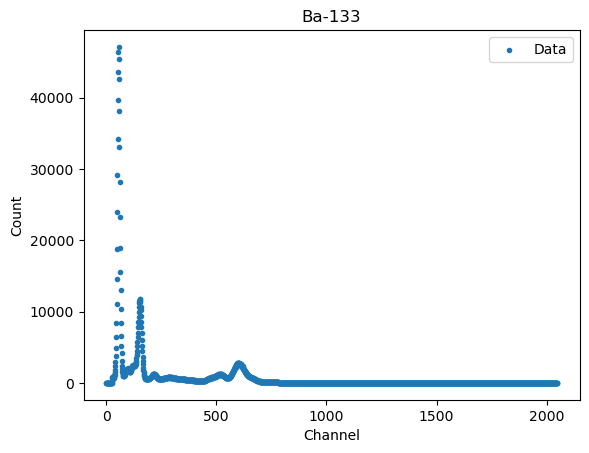

In [2]:
plt.scatter(x_data_1, y_data_1, label='Data', marker='.')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Ba-133')
plt.legend()
plt.show()

### Peak 1 - 0.81 MeV

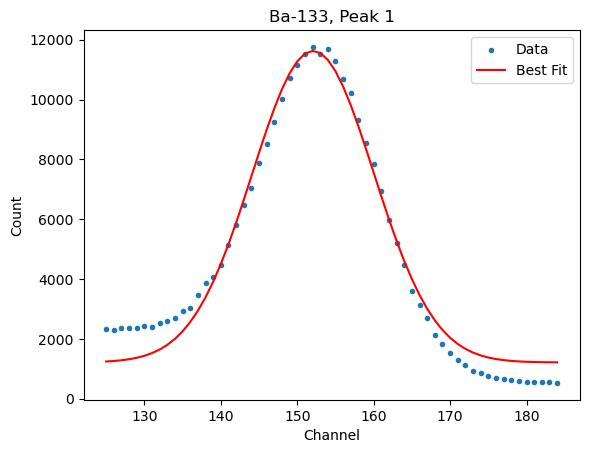

Peak 1 (0.081 MeV):

A1 = 10418.49998382 ± 212.43121451
B1 = 152.07861385 ± 0.16649484
C1 = 7.95682917 ± 0.22181133
D = 1209.96857789 ± 136.73463933


In [3]:
# peak 1

x_min = 125
x_max = 185
A1 = 8000
B1 = 162
C1 = 5
D = 5000

params, covariance = curve_fit(fgaussian, x_data_1[x_min:x_max], y_data_1[x_min:x_max], 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_1[x_min:x_max], y_data_1[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_1[x_min:x_max], fgaussian(x_data_1[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Ba-133, Peak 1')
plt.legend()
plt.show()

print('Peak 1 (0.081 MeV):')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

### Peak 2 and Peak 3 - 0.276 MeV and 0.303 MeV

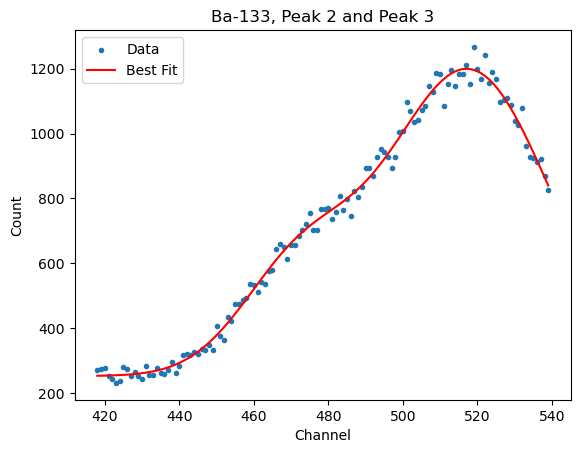

Peak 2 (0.276 MeV) and Peak 3 (0.303 MeV):

A2 = 322.66711698 ± 25.15732156
B2 = 472.29183893 ± 8.75634247
C2 = 15.66850431 ± 1.35714786
A3 = 942.17561631 ± 8.75634247
B3 = 517.59844851 ± 0.58918073
C3 = 22.02405030 ± 0.81171534
D = 252.24574936 ± 0.58918073


In [4]:
# peak 2 and peak 3

x_min = 418
x_max = 540
A1 = 500
B1 = 480
C1 = 7
A2 = 1000
B2 = 520
C2 = 15
D = 200

params, covariance = curve_fit(ftwogaussian, x_data_1[x_min:x_max], y_data_1[x_min:x_max], 
                               p0=[A1, A2, B1, B2, C1, C2, D])

A1_fit, A2_fit, B1_fit, B2_fit, C1_fit, C2_fit, D_fit = params

uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_1[x_min:x_max], y_data_1[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_1[x_min:x_max], ftwogaussian(x_data_1[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Ba-133, Peak 2 and Peak 3')
plt.legend()
plt.show()

print('Peak 2 (0.276 MeV) and Peak 3 (0.303 MeV):')
print()
print(f'A2 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B2 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C2 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'A3 = {A2_fit:.8f} ± {uncert[1]:.8f}')
print(f'B3 = {B2_fit:.8f} ± {uncert[3]:.8f}')
print(f'C3 = {C2_fit:.8f} ± {uncert[5]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

### Peak 4 and Peak 5 - 0.356 MeV and 0.384 MeV

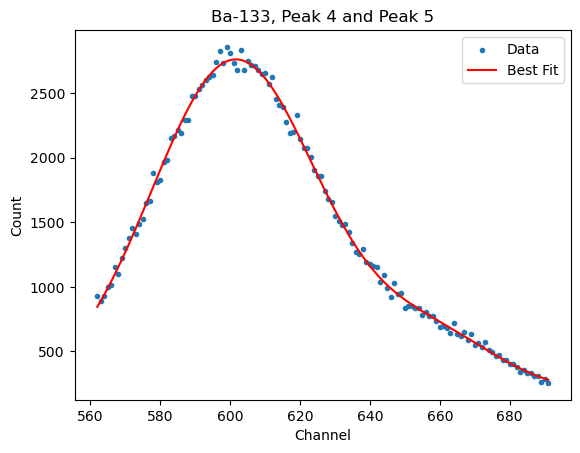

Peak 4 (0.356 MeV) and Peak 5 (0.384 MeV):

A4 = 2570.04861677 ± 41.66018169
B4 = 601.43518679 ± 0.27583297
C4 = 23.90687836 ± 0.34627554
A5 = 419.37899382 ± 36.27038053
B5 = 657.59168788 ± 1.61513582
C5 = 19.13162170 ± 1.53199569
D = 186.10849311 ± 45.66269520


In [5]:
# peak 4 and peak 5

x_min = 562
x_max =692

params, covariance = curve_fit(ftwogaussian, x_data_1[x_min:x_max], y_data_1[x_min:x_max], p0=[2700, 600, 600, 650, 25, 25, 100]) # peak 3

A1_fit, A2_fit, B1_fit, B2_fit, C1_fit, C2_fit, D_fit = params

uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_1[x_min:x_max], y_data_1[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_1[x_min:x_max], ftwogaussian(x_data_1[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Ba-133, Peak 4 and Peak 5')
plt.legend()
plt.show()

print('Peak 4 (0.356 MeV) and Peak 5 (0.384 MeV):')
print()
print(f'A4 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B4 = {B1_fit:.8f} ± {uncert[2]:.8f}')
print(f'C4 = {C1_fit:.8f} ± {uncert[4]:.8f}')
print(f'A5 = {A2_fit:.8f} ± {uncert[1]:.8f}')
print(f'B5 = {B2_fit:.8f} ± {uncert[3]:.8f}')
print(f'C5 = {C2_fit:.8f} ± {uncert[5]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[6]:.8f}')

# Cd-109:

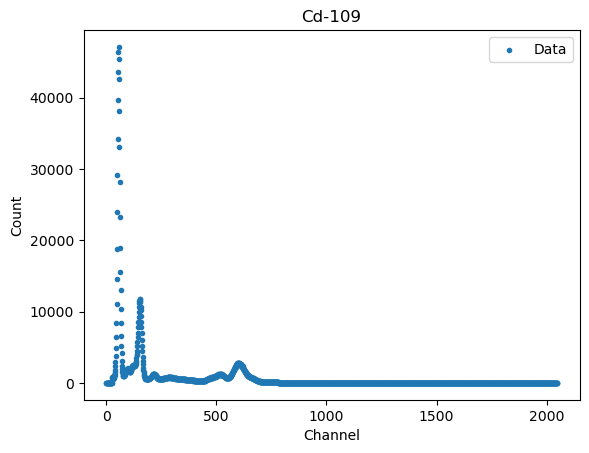

In [6]:
plt.scatter(x_data_1, y_data_1, label='Data', marker='.')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Cd-109')
plt.legend()
plt.show()

### Peak 1 - 0.088 MeV

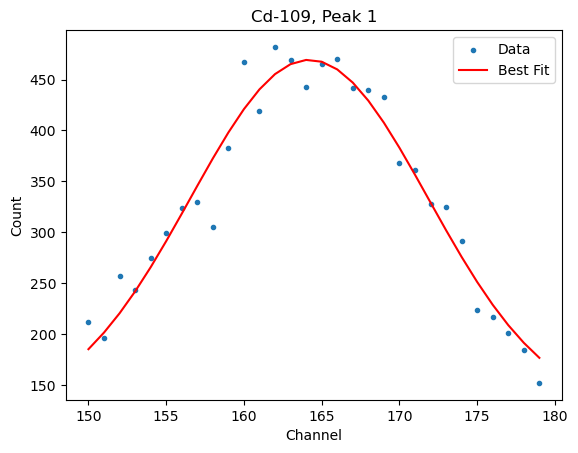

Peak 1 (0.088 MeV):

A1 = 346.04029201 ± 34.32790732
B1 = 164.20182530 ± 0.20827665
C1 = 7.65235801 ± 0.83017220
D = 123.30576258 ± 37.40324388


In [7]:
# peak 1

x_min = 150
x_max = 180
A1 = 400
B1 = 162
C1 = 5
D = 130

params, covariance = curve_fit(fgaussian, x_data_2[x_min:x_max], y_data_2[x_min:x_max], 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_2[x_min:x_max], y_data_2[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_2[x_min:x_max], fgaussian(x_data_2[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Cd-109, Peak 1')
plt.legend()
plt.show()

print('Peak 1 (0.088 MeV):')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

# Co-57:

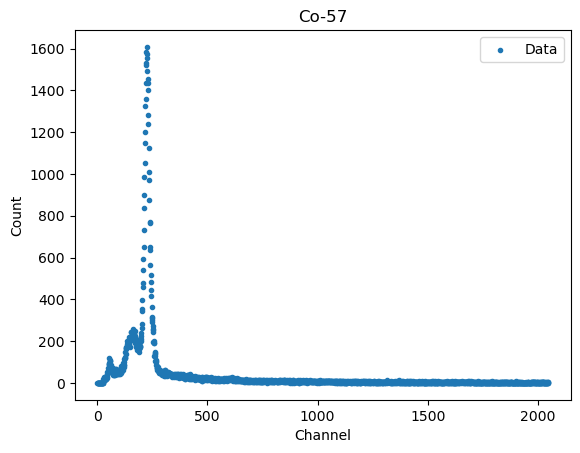

In [8]:
plt.scatter(x_data_3, y_data_3, label='Data', marker='.')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Co-57')
plt.legend()
plt.show()

### Peak 1 - 0.122 MeV

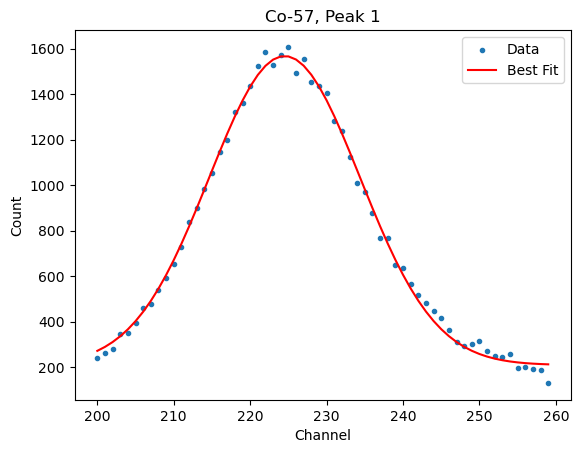

Peak 1 (0.122 MeV):

A1 = 1358.37957039 ± 11.21231791
B1 = 224.50810601 ± 0.07393781
C1 = 9.87278974 ± 0.11477309
D = 209.64464403 ± 9.19432735


In [9]:
# peak 1

x_min = 200
x_max = 260
A1 = 1400
B1 = 225
C1 = 10
D = 20

params, covariance = curve_fit(fgaussian, x_data_3[x_min:x_max], y_data_3[x_min:x_max], 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_3[x_min:x_max], y_data_3[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_3[x_min:x_max], fgaussian(x_data_3[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Co-57, Peak 1')
plt.legend()
plt.show()

print('Peak 1 (0.122 MeV):')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

# Co-60:

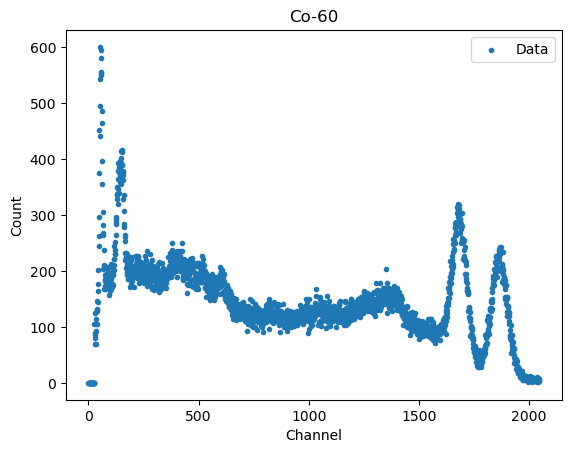

In [10]:
plt.scatter(x_data_4, y_data_4, label='Data', marker='.')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Co-60')
plt.legend()
plt.show()

### Peak 1 - 1.175 MeV

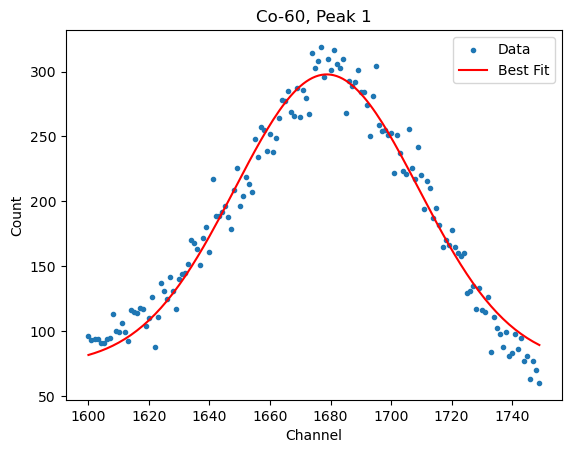

Peak 1 (1.175 MeV):

A1 = 224.06515887 ± 4.55252692
B1 = 1678.74244998 ± 0.37974535
C1 = 30.38169331 ± 0.86137665
D = 73.75475838 ± 4.78116345


In [11]:
# peak 1

x_min = 1600
x_max = 1750
A1 = 200
B1 = 1680
C1 = 30
D = 95

params, covariance = curve_fit(fgaussian, x_data_4[x_min:x_max], y_data_4[x_min:x_max], 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_4[x_min:x_max], y_data_4[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_4[x_min:x_max], fgaussian(x_data_4[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Co-60, Peak 1')
plt.legend()
plt.show()

print('Peak 1 (1.175 MeV):')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

### Peak 2 - 1.333 MeV

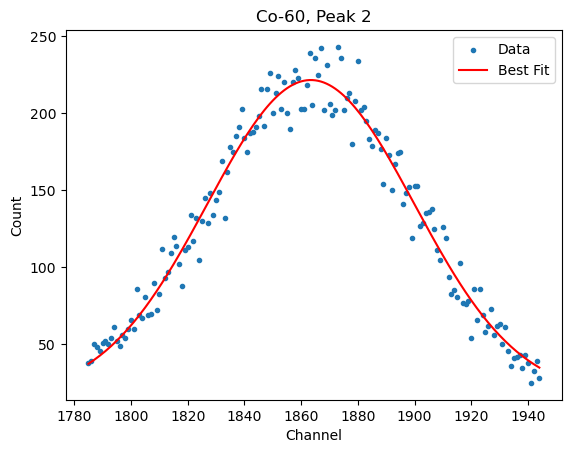

Peak 1 (1.333 MeV):

A2 = 204.46234689 ± 5.07336214
B2 = 1863.40479170 ± 0.37650562
C2 = 36.50851121 ± 1.13368434
D = 17.05763214 ± 5.55498802


In [12]:
# peak 2

x_min = 1785
x_max = 1945
A1 = 200
B1 = 1860
C1 = 37
D = 12

params, covariance = curve_fit(fgaussian, x_data_4[x_min:x_max], y_data_4[x_min:x_max], 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_4[x_min:x_max], y_data_4[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_4[x_min:x_max], fgaussian(x_data_4[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Co-60, Peak 2')
plt.legend()
plt.show()

print('Peak 1 (1.333 MeV):')
print()
print(f'A2 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B2 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C2 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

# Mn-54:

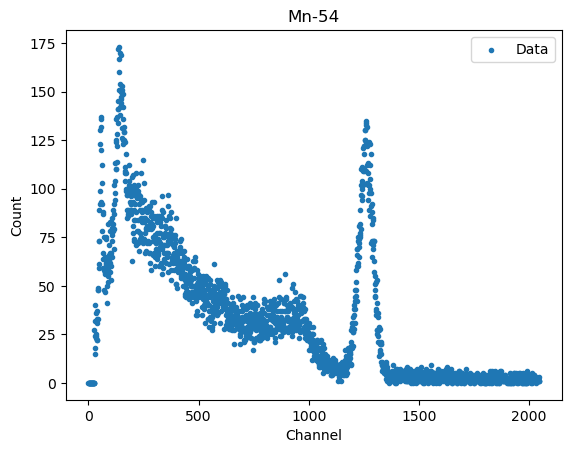

In [13]:
plt.scatter(x_data_5, y_data_5, label='Data', marker='.')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Mn-54')
plt.legend()
plt.show()

### Peak 1 - 0.835 MeV

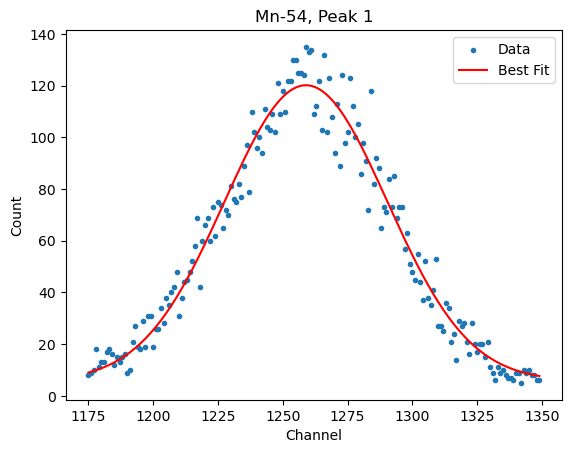

Peak 1 (0.835 MeV):

A1 = 114.36806944 ± 1.86267759
B1 = 1258.92413465 ± 0.40462745
C1 = 31.40224297 ± 0.75097091
D = 5.80917017 ± 1.78014926


In [14]:
# peak 2

x_min = 1175
x_max = 1350
A1 = 120
B1 = 1258
C1 = 30
D = 0

params, covariance = curve_fit(fgaussian, x_data_5[x_min:x_max], y_data_5[x_min:x_max], 
                               p0=[A1, B1, C1, D]) # peak 1

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_5[x_min:x_max], y_data_5[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_5[x_min:x_max], fgaussian(x_data_5[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Mn-54, Peak 1')
plt.legend()
plt.show()

print('Peak 1 (0.835 MeV):')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

# Na-22:

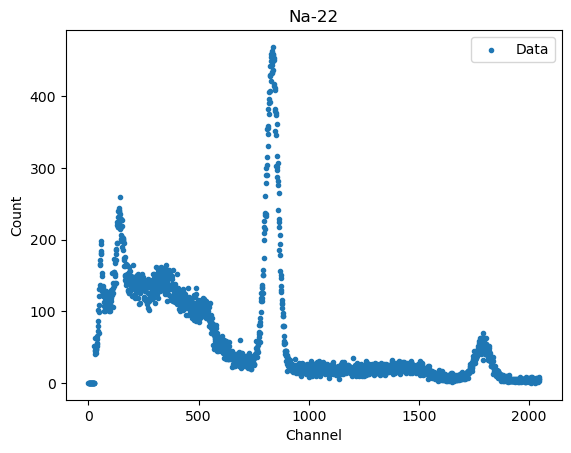

In [15]:
plt.scatter(x_data_6, y_data_6, label='Data', marker='.')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Na-22')
plt.legend()
plt.show()

### Peak 1 - 0.511 MeV

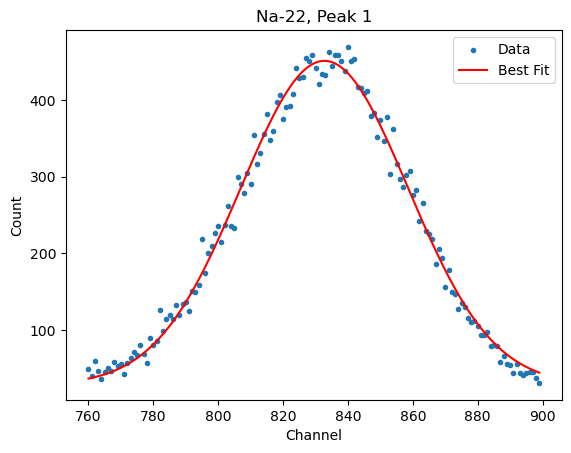

Peak 1 (0.511 MeV):

A1 = 422.26299671 ± 4.15863327
B1 = 832.73769226 ± 0.19189667
C1 = 25.83608973 ± 0.37109926
D = 28.61966019 ± 4.08004798


In [16]:
# peak 1

x_min = 760
x_max = 900
A1 = 400
B1 = 840
C1 = 30
D = 20

params, covariance = curve_fit(fgaussian, x_data_6[x_min:x_max], y_data_6[x_min:x_max], 
                               p0=[A1, B1, C1, D]) # peak 1

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_6[x_min:x_max], y_data_6[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_6[x_min:x_max], fgaussian(x_data_6[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Na-22, Peak 1')
plt.legend()
plt.show()

print('Peak 1 (0.511 MeV):')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

### Peak 2 - 1.115 MeV

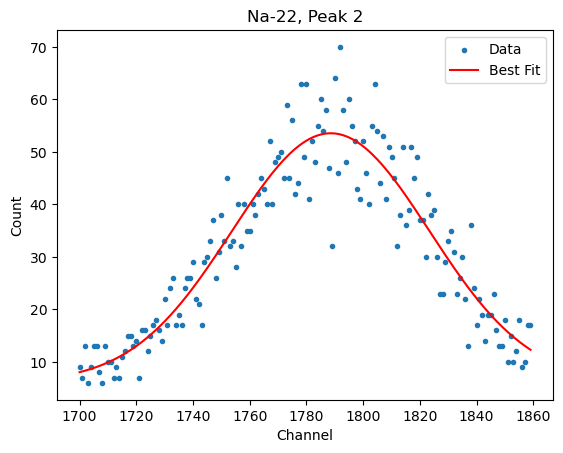

Peak 2 (1.115 MeV):

A2 = 47.38374404 ± 1.92464944
B2 = 1788.55672789 ± 0.76572099
C2 = 34.84914902 ± 1.85993531
D = 6.17021883 ± 2.04531110


In [17]:
# peak 2

x_min = 1700
x_max = 1860
A1 = 100
B1 = 1800
C1 = 30
D = 0

params, covariance = curve_fit(fgaussian, x_data_6[x_min:x_max], y_data_6[x_min:x_max], 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_6[x_min:x_max], y_data_6[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_6[x_min:x_max], fgaussian(x_data_6[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Na-22, Peak 2')
plt.legend()
plt.show()

print('Peak 2 (1.115 MeV):')
print()
print(f'A2 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B2 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C2 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

## Finding a linear fit for gamma ray energy [MeV] vs. channel number for known energies. 

$$ \text{Equation for linear fit: } C = mE + b$$

Where $C$ is the count, $E$ is the gamma ray energy, $m$ is the slope, and $b$ is the y-intercept. 

| Material | Energy [MeV] | Channel ± Error           |
|----------|--------------|---------------------------|
| Ba-133   | 0.081        | 152.07861385 ± 0.16649484 |
| Cd-109   | 0.088        | 164.20182530 ± 0.20827665 |
| Co-57    | 0.122        | 224.50810601 ± 0.07393781 |
| Ba-133   | 0.276        | 472.29183893 ± 8.75634247 |
| Ba-133   | 0.303        | 517.59844851 ± 0.58918073 |
| Ba-133   | 0.356        | 601.43518679 ± 0.27583297 |
| Ba-133   | 0.384        | 657.59168788 ± 1.61513582 |
| Na-22    | 0.511        | 832.73769226 ± 0.19189667 |
| Mn-54    | 0.835        | 1258.92413465 ± 0.40462745|
| Na-22    | 1.115        | 1788.55672789 ± 0.76572099|
| Co-60    | 1.175        | 1678.74244998 ± 0.37974535|
| Co-60    | 1.333        | 1863.40479170 ± 0.37650562|

In the cell below, we take these data points and use linear regression to find a linear line of best fit, as well as the combined error of the $C$ values, the standard error of the slope $m$, and the error in the intercept $b$. Then after solving the equation for linear fit for $E$ and taking its partials, we can then use use the formula below to solve for the error in the energy $E$.  

$$ \text{Equation for propagation of error: } (\sigma_{E})^2 = \Sigma^{3}_{i=1}\biggl(\sigma_i \frac{\partial E}{\partial a_i}\biggr)^2 = \biggl(\sigma_C \frac{\partial E}{\partial C} \biggr)^2 + \biggl(\sigma_m \frac{\partial E}{\partial m}  \biggr)^2 + \biggl(\sigma_b \frac{\partial E}{\partial b} \biggr)^2$$

$$ \text{Linear fit equation solved for E: } \hspace{0.2cm} E = \frac{C - b}{m}  $$

$$ \frac{\partial E}{\partial C} = \frac{1}{m} \hspace{1cm} \frac{\partial E}{\partial m} = -\frac{C - b}{m^2} \hspace{1cm} \frac{\partial E}{\partial b} = -\frac{1}{m} $$

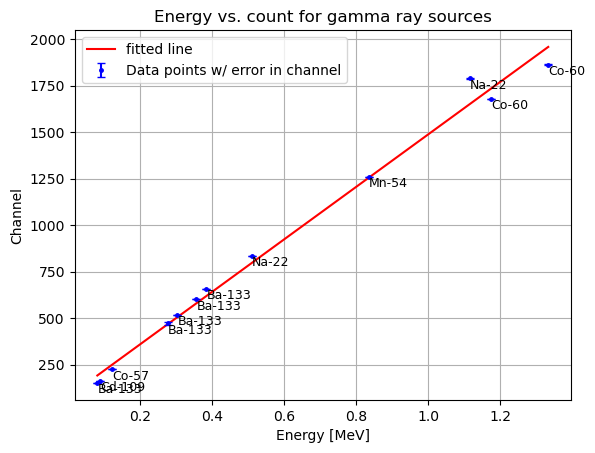

Linear fit: C = (1410.65579331+/-41.40989136)E + (77.61391996+/-28.86453350)


In [18]:
E_data = np.array([0.081, 0.088, 0.122, 0.276, 
                   0.303, 0.356, 0.384, 0.511, 
                   0.835, 1.115, 1.175, 1.333])

C_data = np.array([152.07861385, 164.20182530, 224.50810601, 
                   472.29183893, 517.59844851, 601.43518679,
                   657.59168788, 832.73769226, 1258.92413465, 
                   1788.55672789, 1678.74244998, 1863.40479170]) 

C_errors = np.array([0.16649484, 0.20827665, 0.07393781, 
                  8.75634247, 0.58918073, 0.27583297, 
                  1.61513582, 0.19189667, 0.40462745, 
                  0.76572099, 0.37974535, 0.37650562])

slope, intercept, r_value, p_value, std_err = stats.linregress(E_data, C_data)

result = stats.linregress(E_data, C_data)

data_labels = ['Ba-133', 'Cd-109', 'Co-57', 
               'Ba-133', 'Ba-133', 'Ba-133',
               'Ba-133', 'Na-22', 'Mn-54', 
               'Na-22', 'Co-60', 'Co-60']

for x, y, label in zip(E_data, C_data, data_labels):
    plt.text(x, y, label, fontsize=9, ha='left', va='top')

res = stats.linregress(E_data, C_data)
#plt.plot(E_data, C_data, '.', color='blue', label='data points')
plt.plot(E_data, res.intercept + res.slope*E_data, 'r', label='fitted line')
plt.errorbar(E_data, C_data, yerr=C_errors, fmt='.', color='blue', 
             label='Data points w/ error in channel', markersize=5, capsize=3)
plt.xlabel('Energy [MeV]')
plt.ylabel('Channel')
plt.title('Energy vs. count for gamma ray sources')
plt.grid(True)
plt.legend()
plt.show()

print(f"Linear fit: C = ({res.slope:.8f}+/-{result.stderr:.8f})E + ({res.intercept:.8f}+/-{result.intercept_stderr:.8f})")

# Unknown: 

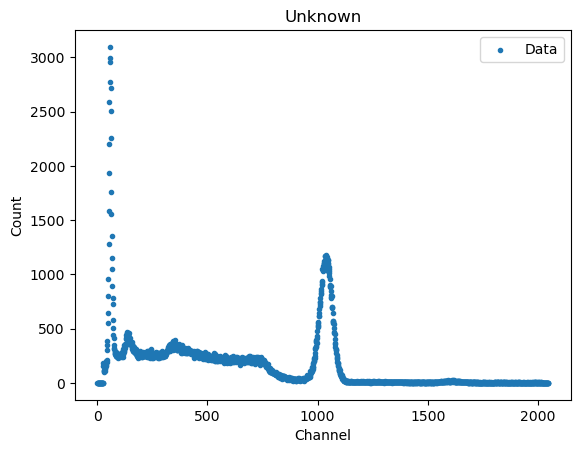

In [19]:
plt.scatter(x_data_7, y_data_7, label='Data', marker='.')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Unknown')
plt.legend()
plt.show()

### Peak 1 

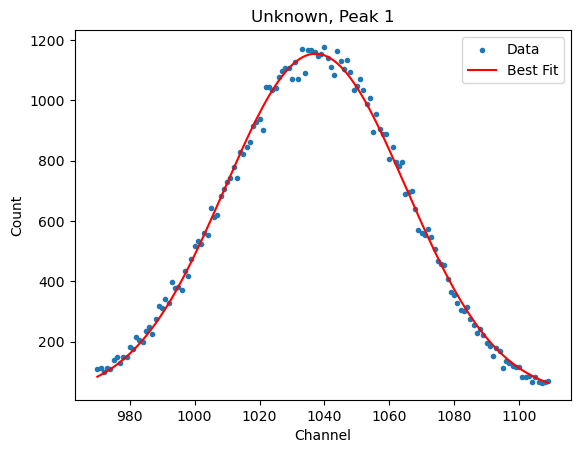

Peak 1 (unknown energy):

A1 = 1133.16966585 ± 7.99630212
B1 = 1037.26734817 ± 0.12423879
C1 = 27.96316183 ± 0.27860882
D = 21.33898688 ± 8.37659500


In [20]:
# peak 1

x_min = 970
x_max = 1110
A1 = 1200
B1 = 1000
C1 = 30
D = 40

params, covariance = curve_fit(fgaussian, x_data_7[x_min:x_max], y_data_7[x_min:x_max], 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_7[x_min:x_max], y_data_7[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_7[x_min:x_max], fgaussian(x_data_7[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Unknown, Peak 1')
plt.legend()
plt.show()

print('Peak 1 (unknown energy):')
print()
print(f'A1 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B1 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C1 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

### Peak 2

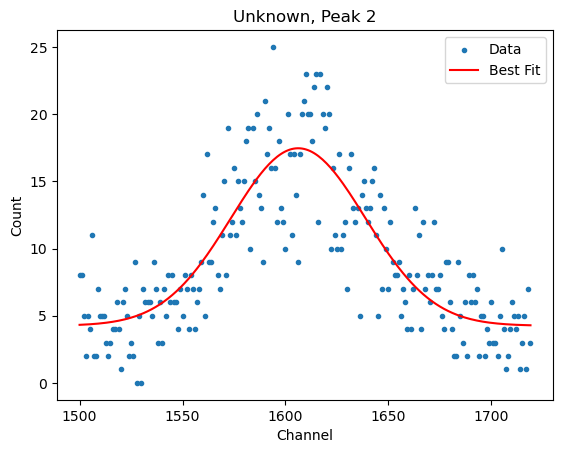

Peak 2 (unknown energy):

A2 = 13.20518077 ± 0.59870962
B2 = 1606.17412676 ± 1.43986508
C2 = 32.65066108 ± 2.10655501
D = 4.25506580 ± 0.44830437


In [21]:
# peak 2

x_min = 1500
x_max = 1720
A1 = 15
B1 = 1606
C1 = 40
D = 2

params, covariance = curve_fit(fgaussian, x_data_7[x_min:x_max], y_data_7[x_min:x_max], 
                               p0=[A1, B1, C1, D]) 

A1_fit, B1_fit, C1_fit, D_fit = params
uncert = np.sqrt(np.diag(covariance))

plt.scatter(x_data_7[x_min:x_max], y_data_7[x_min:x_max], label='Data', marker='.')
plt.plot(x_data_7[x_min:x_max], fgaussian(x_data_7[x_min:x_max], *params), label='Best Fit', color='red')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Unknown, Peak 2')
plt.legend()
plt.show()

print('Peak 2 (unknown energy):')
print()
print(f'A2 = {A1_fit:.8f} ± {uncert[0]:.8f}')
print(f'B2 = {B1_fit:.8f} ± {uncert[1]:.8f}')
print(f'C2 = {C1_fit:.8f} ± {uncert[2]:.8f}')
print(f'D = {D_fit:.8f} ± {uncert[3]:.8f}')

## Linear fit with unknown quantities

* Unknown, peak 1:

$ (E_{1}, 1037.26734817 ± 0.12423879) $

* Unknown, peak 2: 

$(E_{2}, 1606.17412676 ± 1.43986508)$

$ C = mE+b \rightarrow E = \frac{C - b}{m}$


In [22]:
C1 = 1037.26734817 # Channel number of Peak 1
C2 = 1606.17412676 # Channel number of Peak 2
m = 1410.65579331 # Slope from line of best fit
b = 77.61391996 # Intercept from line of best fit 
C1_error = 0.12423879 
C2_error = 1.43986508
m_error = 41.40989136 #MeV^-1
b_error = 28.86453350 

partial_w_respect_to_C = 1/m
partial_w_respect_to_m_for_C1 = -(C1 - b)/m**2
partial_w_respect_to_m_for_C2 = -(C2 - b)/m**2
partial_w_respect_to_b = -1/m

# energy for peak 1
E1 = (C1 - b)/m 
E1_error = ((C1_error * partial_w_respect_to_C)**2 
           + (m_error * partial_w_respect_to_m_for_C1)**2 
           + (b_error * partial_w_respect_to_b)**2)**0.5 

# energy for peak 2
E2 = (C2 - b)/m
E2_error = ((C2_error * partial_w_respect_to_C)**2 
           + (m_error * partial_w_respect_to_m_for_C2)**2 
           + (b_error * partial_w_respect_to_b)**2)**0.5 

print(f'Peak 1 is at (E1, C1) = ({E1} ± {E1_error}, {C1} ± {C1_error})')
print()
print(f'Peak 2 is at (E2, C2) = ({E2} ± {E2_error}, {C2} ± {C2_error})')

Peak 1 is at (E1, C1) = (0.680288864768523 ± 0.028591785162186863, 1037.26734817 ± 0.12423879)

Peak 2 is at (E2, C2) = (1.0835812776221945 ± 0.03783534499638608, 1606.17412676 ± 1.43986508)


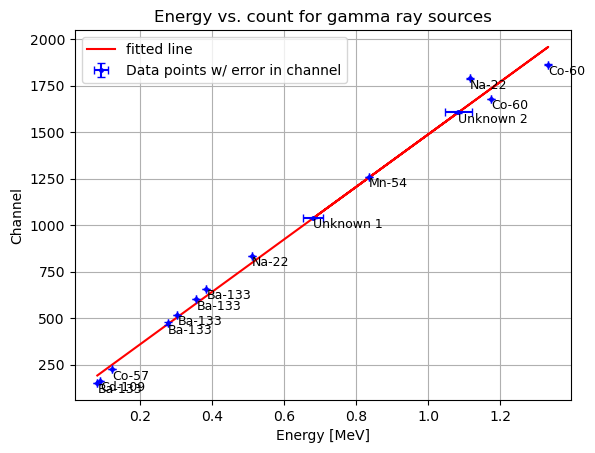

Linear fit: C = (1410.65579331+/-35.68091065)E + (77.61391996+/-26.05891904)


In [23]:
E_data = np.array([0.081, 0.088, 0.122, 0.276, 
                   0.303, 0.356, 0.384, 0.511, 
                   0.835, 1.115, 1.175, 1.333, 
                   0.680288864768523, 1.0835812776221945])

C_data = np.array([152.07861385, 164.20182530, 224.50810601, 
                   472.29183893, 517.59844851, 601.43518679,
                   657.59168788, 832.73769226, 1258.92413465, 
                   1788.55672789, 1678.74244998, 1863.40479170,
                  1037.26734817, 1606.17412676]) 

E_errors = np.array([0, 0, 0,
                    0, 0, 0, 
                    0, 0, 0,
                    0, 0, 0,
                    0.028591785162186863, 
                     0.03783534499638608])

C_errors = np.array([0.16649484, 0.20827665, 0.07393781, 
                  8.75634247, 0.58918073, 0.27583297, 
                  1.61513582, 0.19189667, 0.40462745, 
                  0.76572099, 0.37974535, 0.37650562,
                     0.12423879, 1.43986508])

slope, intercept, r_value, p_value, std_err = stats.linregress(E_data, C_data)

result = stats.linregress(E_data, C_data)

data_labels = ['Ba-133', 'Cd-109', 'Co-57', 
               'Ba-133', 'Ba-133', 'Ba-133',
               'Ba-133', 'Na-22', 'Mn-54', 
               'Na-22', 'Co-60', 'Co-60', 
               'Unknown 1', 'Unknown 2']

for x, y, label in zip(E_data, C_data, data_labels):
    plt.text(x, y, label, fontsize=9, ha='left', va='top')

res = stats.linregress(E_data, C_data)
#plt.plot(E_data, C_data, '.', color='blue', label='data points')
plt.plot(E_data, res.intercept + res.slope*E_data, 'r', label='fitted line')
plt.errorbar(E_data, C_data, xerr=E_errors , yerr=C_errors, fmt='.', color='blue', 
             label='Data points w/ error in channel', markersize=5, capsize=3)
plt.xlabel('Energy [MeV]')
plt.ylabel('Channel')
plt.title('Energy vs. count for gamma ray sources')
plt.grid(True)
plt.legend()
plt.show()

print(f"Linear fit: C = ({res.slope:.8f}+/-{result.stderr:.8f})E + ({res.intercept:.8f}+/-{result.intercept_stderr:.8f})")

## Using the energies to find the unknown material(s)

Looked up on this website.
https://atom.kaeri.re.kr/old/gamrays.html

Assuming the half-life is about 6 months, we can narrow our search to the following materials. We also know that the unknown is a compound with two materials, since we were given two different activity levels on the packaging. So we ought to look for a unique material per peak. 

#### Peak 1: $\sim680 ± 29 \text{ keV}$

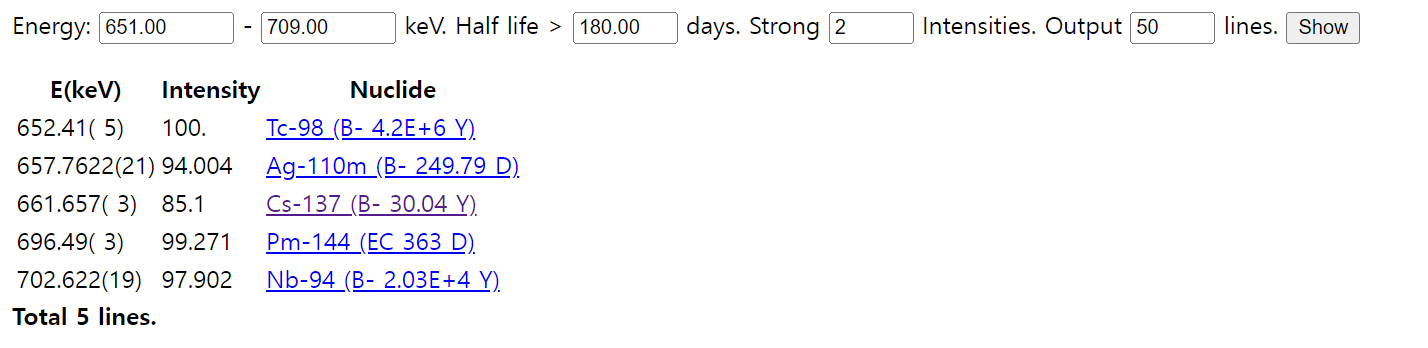

#### Peak 2: $\sim1084 ± 39 \text{ keV}$

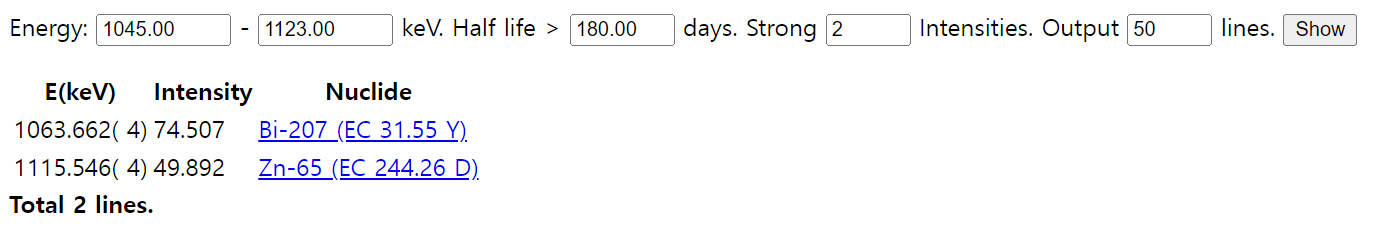

For Peak 1, it would be reasonably to conclude that the isotope is $^{137}\text{Cs}$, since each ofthe other isotopes have multiple other gamma-rays in the energy spectrum that we should also see in our data. While $^{137}\text{Cs}$ does have a second gamma-ray at a lower energy that should be present on the spectrum, its intensity is so low that is easily covered up by the extra radiation in the compound. 

For Peak 2, it would be reasonable to conclude that the isotope is $^{65}\text{Zn}$. This is because while the other compound $^{207}\text{Bi}$ does in fact have a gamma-ray in this energy range, it is relativly low intensity. Additionally, there should be another, larger gamma present around $570 \text{ keV}$, which we can see there isn't. The material being $^{65}\text{Zn}$ would also help to explain why the peak was so small, since it has a relatively small half-life, and thus has probably decayed quite a bit by the time we performed our experiment. 